In [1]:
import numpy as np
import pandas as pd
import pickle   # сохранение модели
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN


In [2]:
def display_clusters_distribution(unique_labels, labels_counts):
    plt.figure(figsize=(8,5))
    plt.bar(unique, counts)
    plt.xlabel('Clusters')
    plt.xticks(unique)
    plt.ylabel('Count')
    plt.title('Clusters distribution')
    plt.show()


In [3]:
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2',
                                         c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=(15,10))
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=(15,10))

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')
    plt.show()


In [4]:
def reduce_dims(df, dims=2, method='pca', perplexity=30):

    assert method in ['pca', 'tsne'], 'Неверно указан метод'

    if method=='pca':
        dim_reducer = PCA(n_components=dims, random_state=42)
        components = dim_reducer.fit_transform(df)
    elif method == 'tsne':
        dim_reducer = TSNE(n_components=dims, learning_rate=250, random_state=42, perplexity=perplexity)
        components = dim_reducer.fit_transform(df)
    else:
        print('Error')

    colnames = ['component_' + str(i) for i in range(1, dims+1)]
    return dim_reducer, pd.DataFrame(data = components, columns = colnames)


In [5]:
def apply_elbow_method(X):
    distortions = []
    K = range(2,30)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=33).fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    plt.figure(figsize=(10, 8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()


In [6]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [7]:
df = pd.read_csv('Credit Card Dataset.csv', sep=',')
df = df.dropna()
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
feature_names = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
X = df[feature_names]


In [34]:
scaler = RobustScaler()
colnames = X.columns
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=colnames)


In [35]:
dim_reducer2d, components_2d = reduce_dims(X_scaled, dims=2, method='pca')
components_2d


,component_1,component_2
0,-2.596229,-0.171497
1,-0.325228,1.774175
2,-0.233322,-0.315416
3,-2.148961,0.150073
4,1.021615,2.109443
...,...,...
8631,-3.493365,-0.555427
8632,-2.196287,-0.800825
8633,-2.697962,-0.552597
8634,-2.981332,-0.307462


In [37]:
kmeans_3 = KMeans(n_clusters=21, random_state=42)

In [38]:
labels_clast_3 = kmeans_3.fit_predict(X_scaled)
labels_clast_3 = pd.Series(labels_clast_3, name='clusters_3')


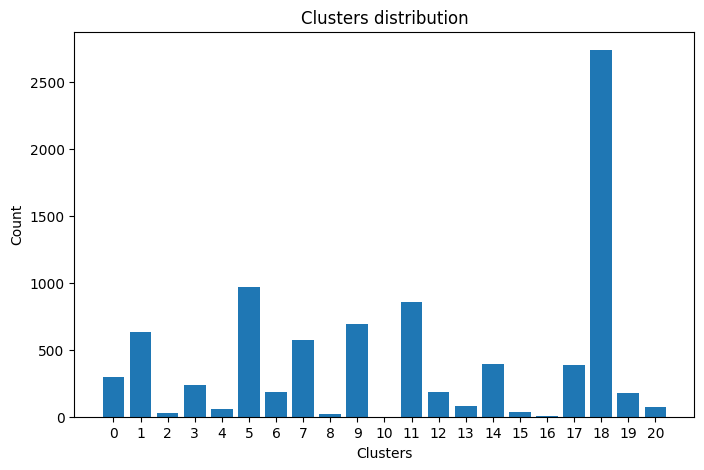

In [39]:
unique, counts = np.unique(labels_clast_3, return_counts=True)
display_clusters_distribution(unique, counts)

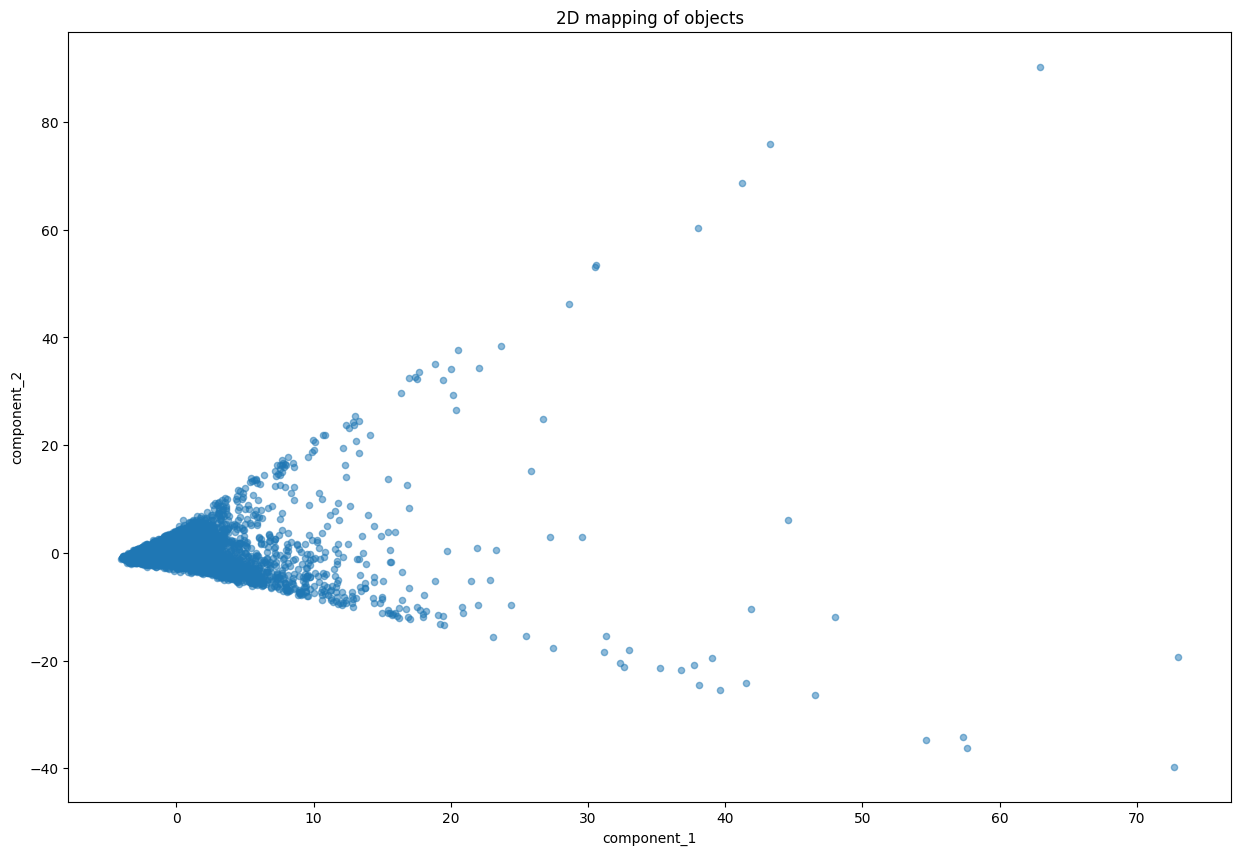

In [40]:
display_components_in_2D_space(components_2d)

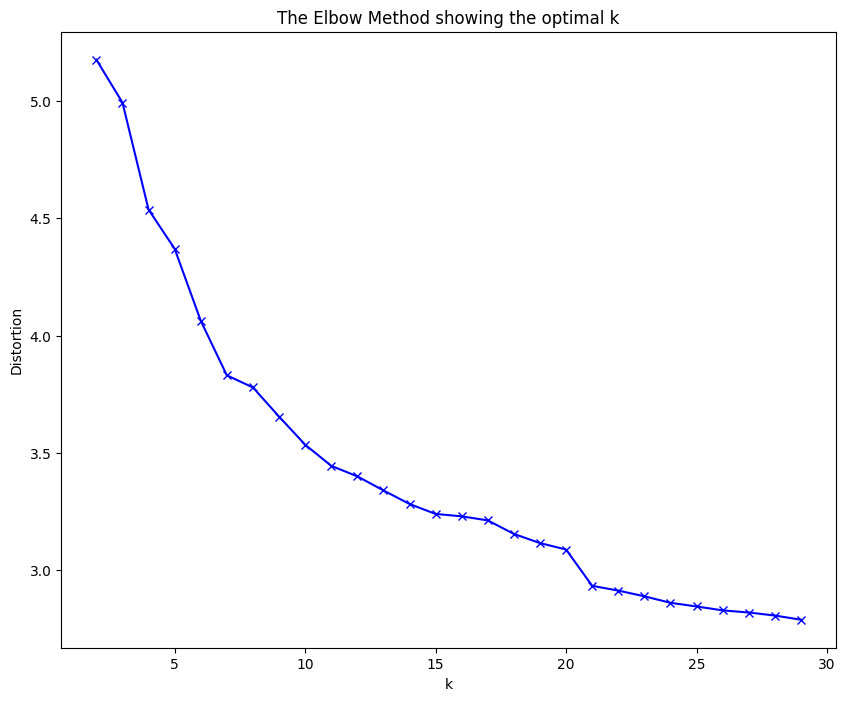

In [36]:
apply_elbow_method(X_scaled)

In [67]:
Dbscan = DBSCAN(eps=0.5, min_samples=14)

In [68]:
Labels_clast = Dbscan.fit_predict(X_scaled)
Labels_clast = pd.Series(labels_clast_3, name='clusters_dbscan')


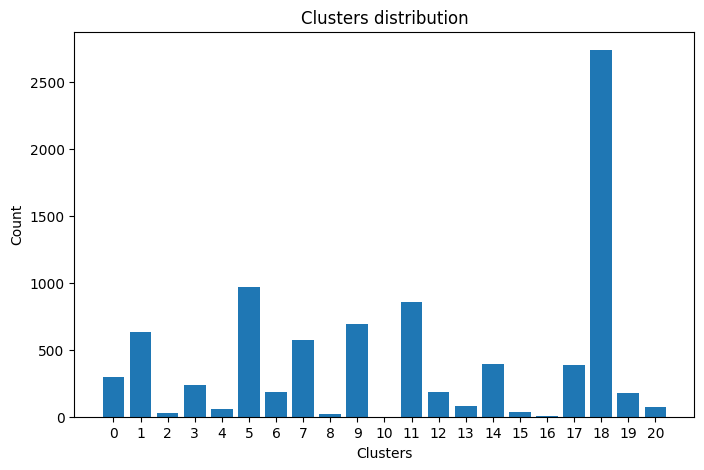

In [69]:
Unique, counts = np.unique(Labels_clast, return_counts=True)
display_clusters_distribution(Unique, counts)

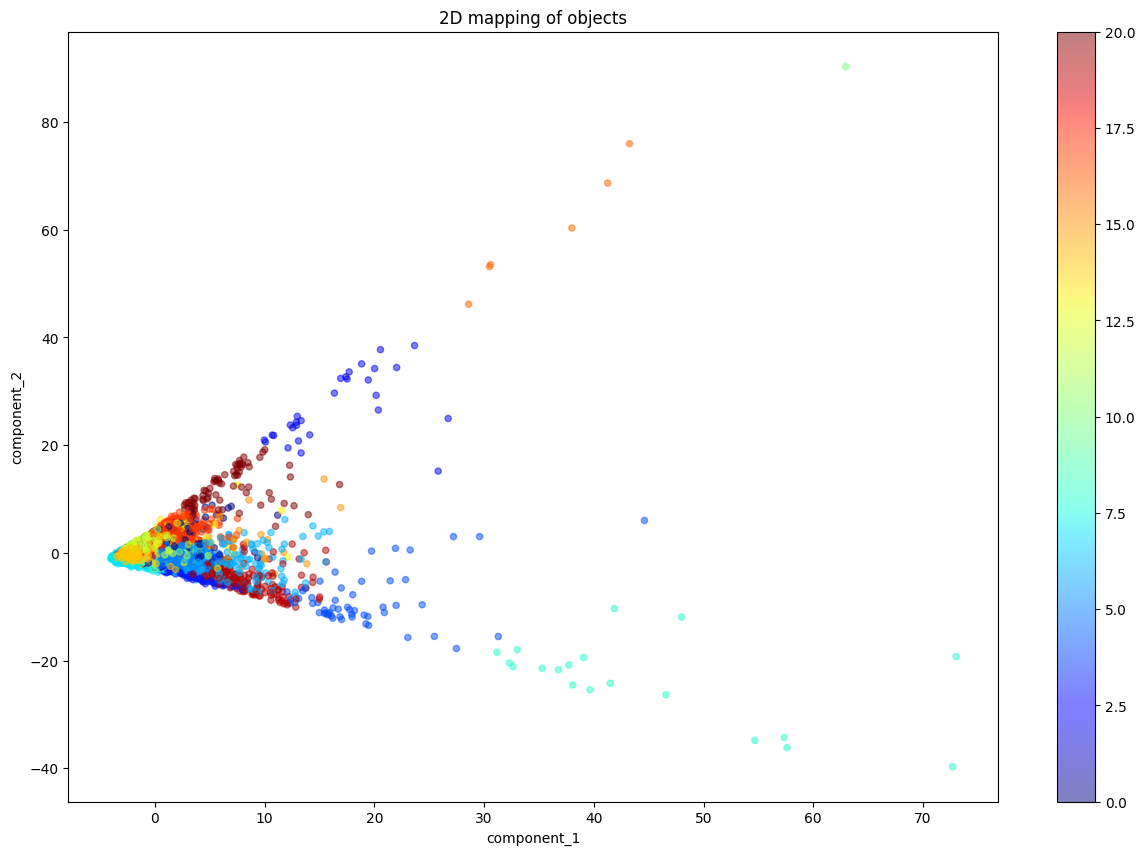

In [70]:
display_components_in_2D_space(components_2d, Labels_clast)

In [43]:
Aggl = AgglomerativeClustering(n_clusters=21)
Aggl.fit(X_scaled)

AgglomerativeClustering(n_clusters=21)

In [44]:
Labels_clast = Aggl.fit_predict(X_scaled)
Labels_clast = pd.Series(Labels_clast, name='clusters_aggl')


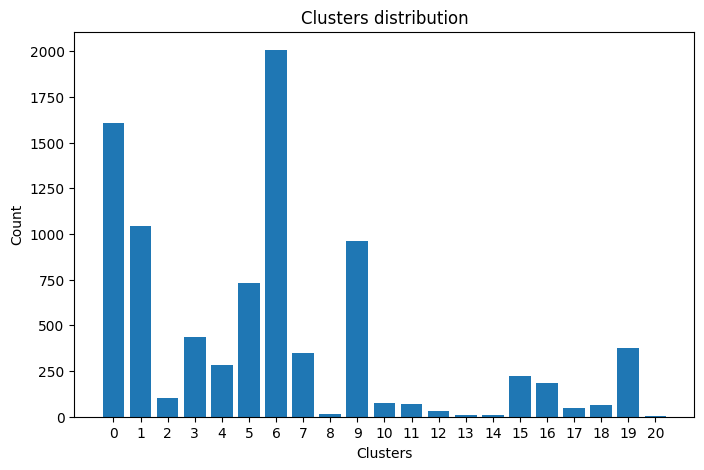

In [45]:
Unique, counts = np.unique(Labels_clast, return_counts=True)
display_clusters_distribution(unique, counts)


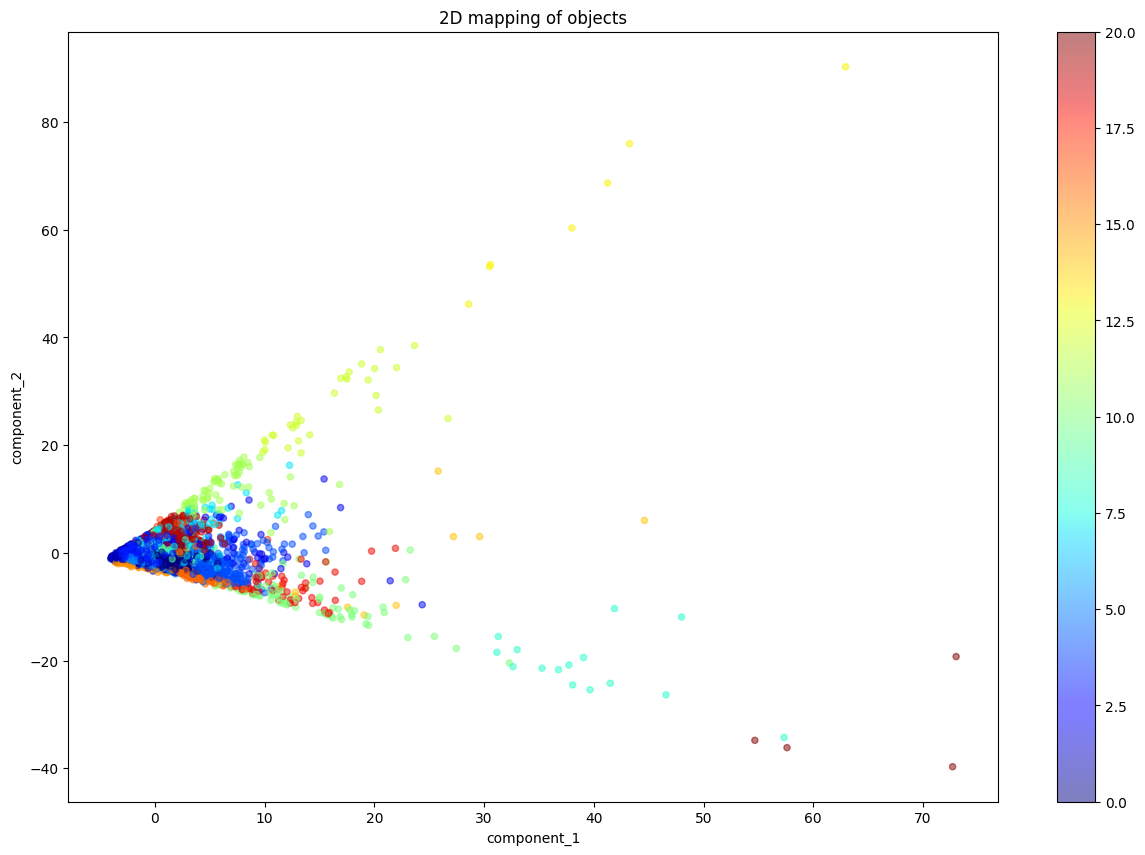

In [46]:
display_components_in_2D_space(components_2d, Labels_clast)

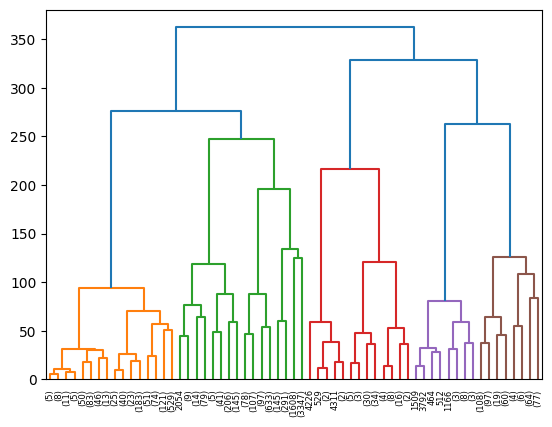

In [41]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
aggl = AgglomerativeClustering(n_clusters=25, compute_distances=True)
aggl.fit(X_scaled)
plot_dendrogram(aggl, truncate_mode='level', p=5)